# Homework Assignment #3 (Individual)
## Agent Based Modeling (ABM), and Graph Theory

### <p style="text-align: right;"> &#9989; Febri Daneswary</p>
### <p style="text-align: right;"> &#9989; fdswry</p>

<img src= "https://scottpjohnson.com/assets/img/disinfo-abm.png" width = 600>

### Goals for this homework assignment
By the end of this assignment, you should be able to:
* Use Git to create a repository, create a new branch, merge branches, track changes to the files within the repository, and push those changes to a remote repository.
* Understand and implement agent objects.
* Run agent based modeling.
* Use your Pandas skills to load the adjacency matrix, understand the graph properties, and visualize it using Networkx.

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **67 points** possible on this assignment. Point values for each part are included in the section headers and question prompts.

**This assignment is due in roughly two weeks from now at 11:59 pm on Sunday, October 28.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3.  Submission instructions can be found at the end of the notebook.

------
<a id="toc"></a>

## Table of contents

0. [Part 0: Upgrade Packages](#part0) (1 point)

1. [Part 1: Git](#gits) (13 points)

2. [Part 2: ABM](#part2) (22 points)

3. [Part 3: A Network of Thrones](#part3) (28 points)

4. [Part 4: Finishing](#conclusion) (3 points)

In [1]:
grades = [1, 13, 22, 28, 3]

print(f"The total grade for this assignment is {sum(grades)}" )

The total grade for this assignment is 67


---
<a id="part0"></a>
[Back to ToC](#toc)

# Part 0: Upgrade Packages

**&#9989; Question 0.1 (1 point)**: Run the cell below. Do you have the correct packages ? If not upgrade them. **You must do this in order to avoid issues in the rest of the notebook.**

In [2]:
%pylab
%matplotlib inline

import scipy as scp
import seaborn as sns

sns.set_context("notebook")

import pandas as pd
import networkx as nx


print(f"Numpy version is {np.__version__} while it should be 1.23.4")
print(f"Scipy version is {scp.__version__} while it should be 1.9.2")
print(f"Pandas version is {pd.__version__} while it should be 1.5.0")
print(f"Networkx version is {nx.__version__} while it should be 2.8.7")

      

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib
Numpy version is 1.20.1 while it should be 1.23.4
Scipy version is 1.6.2 while it should be 1.9.2
Pandas version is 1.2.4 while it should be 1.5.0
Networkx version is 2.5 while it should be 2.8.7


---
<a id="gits"></a>
[Back to ToC](#toc)

# Part 1: Git (13 points)

For this assignment, you're going to add it to the `cmse202-f22-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Question 1.1 (1 point)**: Navigate to your `cmse202-f22-turnin` **local** repository and create a new directory called `hw-03` and copy this notebook in that new directory.



``` bash 
cd cmse202-F22-turnin
mkdir hw-03 

```

&#9989; **Question 1.2 (1 point)**: Before you move on, put the command that your instructor should run to pull changes from  your repository in the markdown cell below.

``` bash
git clone https://github.com/fdswry/cmse202-F22-turnin.git 

```

&#9989; **Question 1.3 (2 points)**: Before you move on, create a new branch called `hw03_branch` and move into it. In the cell below put the command(s) to create a new branch and to checkout the new branch. (_Note_: your TA will be able to see if you have created the branch and its history).

``` bash
git branch hw03_branch
git checkout hw03_branch
git status

```

&#9989; **Question 1.4 (3 points)** Check the status of your local `git`.

``` bash 
git status

```
Copy and paste below the output of the command.

``` bash
On branch hw03_branch
Untracked files:
  (use "git add <file>..." to include in what will be committed)
        ./

nothing added to commit but untracked files present (use "git add" to track)
```

What is the name of the branch you are in ? 

``` bash
hw03_branch
```

**Important:** If you are still in the `main` branch you must switch to the new branch. 

&#9989; **Question 1.5 (3 points):**
Add your name and GitHub username to the top of the notebook, then add and commit **ONLY** the notebook.

``` bash
git add -A
git commit -m "initial commit"
```

What is the commit message you used ?

``` bash
"initial commit"
```

``` bash
git status
```

&#9989; **Question 1.6 (1 point):** Before moving on. Check that the notebook you are working on is the correct one. Run the following cell. **Are you in the new folder you just created?** If not close this notebook and open the one in the `hw-03` folder


In [3]:
!pwd

/home/daneswar/cmse202-F22-turnin/hw-03


&#9989; **Question 1.7 (1 point):** Finally push the updated notebook to GitHub.

``` bash
git push
```


**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f22-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.


### &#128721; STOP
**Pause to commit your changes to your Git repository! (1 point)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 1", and push the changes to GitHub.


---
<a id="part2"></a>
[Back to ToC](#toc)

# Part 2: Analyzing an Agent-Based Model (22 points)

For this problem, you will be working with an agent-based model that is based on a problem from Game Theory. The point is to find the best place to put grocery stores. A key assumption of our model is that **consumers will go to the grocery store that is closest to their home.** The  rules of the game are as follows:
1. On a grid of size (x,y), create a set of randomly distributed homes. The probability that any grid point will have a home is proportional to the variable `population_density`, which is specified by the user (see the Forest Fire model from 201, where we used `f_trees_start` for the same purpose).
1. Next, find the best place to put a grocery store. 
    - If this is the first grocery store in the area, place it in the location that has the smallest total distance from the houses in the area (I.e., minimize the sum of the distances between the grocery store and all of the houses).
    - If there is already one or more grocery stores in the area, find the best location to put another store. The best place to put a store is the point where it is *the closest store to the largest number of houses.*



### Part 2.1: Pre-Coding Questions

&#9989; **Question 2.1.1 (1 point) Thinking about Programming Paradigms:** What type of programming paradigm do you think would make the most sense for solving this problem (Linear, Functional, or Object-Oriented)? Give an explanation for your answer.


I think in this case a Object-Oriented programming paradigm would make the most sense for solving this problem because OOP provides a structured programming so that properties and behaviors are bundled into individual objects. For instance, the Animal OOP program we did previously had a lot of properties and attributes, such as information about how many zookeepers are needed. In addition, OOP is the best approach to model real-life scenarios like an agent-based model. 

&#9989; **Question 2.1.2 (1 point) Making Predictions:** What do you think will be the best place to put the first grocery store? What about a second store? Provide an explanation.

I think the best place to put the first grocery store would be where there is the smallest total distance from the houses in the area. Preferably where there is a large population density in one area. The second store would probably still be best located near the first store but a little bit further away. This way consumers have another choice if the first store is overcrowded or any other reasons. 

### Part 2.2: Modeling with Code

&#9989; **Question 2.2.1 (1 point) Getting the Code:**
We are providing you with code that models this game. Download the code here. Write the commands you used to download the code in the cell below. 

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_3/store_placement.py`


In [4]:
# Put the command to download the dataset here

curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_3/store_placement.py

SyntaxError: invalid syntax (<ipython-input-4-c83446836ca0>, line 3)

&#9989; **Question 2.2.2 (1 point) Coding Paradigm:** What programming paradigm does this code use?

It uses classes and objects. Therefore, it is an object oriented programming paradigm.

&#9989; **Question 2.2.3 (3 points) Documenting the Code:**
In the cell below, *copy and paste the code from the file you just downloaded. Write doc strings for all of the functions in the code.*

In [ ]:
# Copy the code here and add your docstrings 

class city(): # Defining a class object
    def __init__(self,x_dim=5,y_dim=5,pop_density=0.5): # Initialize 3 parameters for the class object
        self.pop_density = pop_density
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.house_x = []
        self.house_y = []
        self.store_pos = []
        self.list_of_dists = []
        self.add_houses()

    def add_houses(self):
        for x in range(self.x_dim):
            for y in range(self.y_dim):
                if np.random.uniform() < self.pop_density:
                    self.house_x.append(x)
                    self.house_y.append(y)
        self.house_x = np.array(self.house_x)
        self.house_y = np.array(self.house_y)

    def get_homes_served(self,dist_to_point):
        homes_served = np.ones_like(self.house_x)
        for kk in range(len(self.list_of_dists)):
            close_houses = dist_to_point < self.list_of_dists[kk]
            homes_served = np.logical_and(homes_served,close_houses)
        return homes_served

    def get_distance_to_point(self,x,y): # function to get distance from store to home
        return np.hypot(x-self.house_x,y-self.house_y)

    def find_best_store_loc(self): # function to find the best store location using the get_distance_to_point function
        best_position = []
        best_homes_served = 0
        best_distance = np.inf
        for x in range(self.x_dim):
            for y in range(self.y_dim):
                dist_to_point = self.get_distance_to_point(x,y)
                if len(self.store_pos) > 0:
                    homes_served  = self.get_homes_served(dist_to_point)
                    if sum(homes_served) > best_homes_served:
                        best_position = [x,y]
                        best_homes_served = sum(homes_served)
                else:
                    if np.sum(dist_to_point) < best_distance:
                        best_distance = np.sum(dist_to_point)
                        best_position = [x,y]
        self.store_pos.append(best_position)
        self.list_of_dists.append(self.get_distance_to_point(best_position[0],best_position[1]))

    def draw(self): # plots the grocery store locations
        store_x,store_y = list(zip(*self.store_pos))
        plt.plot(self.house_x,self.house_y,markersize=8,color="tab:blue",marker="s",linestyle="None")
        plt.plot(store_x,store_y ,color='tab:red',markersize=25,marker=".",linestyle="None")
        plt.show()

&#9989; **Question 2.2.4 (3 points) See the Agent? See the Model?:**
Most agent-based models have three things: agents, actions, and an environment. Agents take actions–usually based on the environment and/or other agents–that affect the environment. Who are the agents in this model? What action(s) can they take? What is the environment? 

The environment is the grid points which take in the class city() agents, and therefore the actions are the attributes and properties contained within the class city() agents. 

&#9989; **Question 2.2.5 (4 points) Testing the Code: One Store**
In the cell below, use the provided code to find the best place to put a single store. Make sure to make a visualization showing the houses and the store. What is the best place to put the first store? How does the output of the model compare to the prediction you made in question 2.1?

In [6]:
# Write your code here

&#9989; **Question 2.2.6 (1 point)** Answer the following question:

- How does this compare to your prediction?

&#9989; **Question 2.2.7 (4 points) Testing the Code: Two Stores**
In the cell below, use the provided code to find the best place to put two stores. Make sure to make a visualization showing the houses and the store. What is the best place to put the next store? How does the output of the model compare to the prediction you made in question 2.1?

In [7]:
# Write your code here

&#9989; **Question 2.2.8 (1 point)** Answer the followign question:

- How does this compare to your prediction?

### &#128721; STOP
**Pause to commit your changes to your Git repository! (1 point)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 2", 


---
<a id="part3"></a>
[Back to ToC](#toc)

# Part 3: Graph Theory (28 points)

Learning goals:

- creating a network from data
- do exploratory data analysis on the graph



## Part 3.1: A Network of Thrones (9 points)

In this part you will be working with graph in order to study a particular social network; the world of Westeros and Essos. This assignment is based on a publication in the Mathematical Association of America. Here is the [link](https://networkofthrones.wordpress.com/about/) of where everything is explained.

<img src = "https://images.squarespace-cdn.com/content/v1/5d3f5ab4e0b0f80001519db3/1626990700500-G54332NIRUZZ0G8XX8S0/8B05E165-D702-4DD5-8A90-5BABA9AAF8AE.jpeg?format=2500w" width = 600>

&#9989; **Question 3.1 (3 points)** To start we need the dataset. Download the edge list given in the link below and open it as a DataFrame with pandas and print the first 5 rows

https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book1-edges.csv

In [8]:
# Put the command to download the dataset here

curl -O https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book1-edges.csv

SyntaxError: invalid syntax (<ipython-input-8-1f80112c5127>, line 3)

In [9]:
# Put the code to open the dataset

import pandas as pd

df = pd.read_csv('asoiaf-book1-edges.csv', delimiter=',')
df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


&#9989; **Question 3.1.2 (12 points)** As you can see this dataset represents the __edge list__ of a graph. This graph was created by counting the number of interactions between two characters in the book. The characters represent the nodes and the edges represent an interaction between two characters. Specifically, if two characters appeared within 15 words of each other then we create an edge between them. 

Before we make a graph out of it, answer the following questions you might need to do some coding:

1. What type of graph is this ? Directed or Undirected ? (1 point)
2. What does the column `weight` indicate ? (1 point)
3. How many edges will the graph have ? (2 points)
4. How many nodes will the graph have ? (4 points) _Hint:_ It is not 139 nor 143
5. How many interaction are there between Eddard-Stark and Cersei-Lannister ? (2 points)
6. How many total interactions are in the entire first book ? (2 point)

You need to show some code in order to get the points

**IMPORTANT:** You should not make a graph yet! You need to answer the above questions without making a graph. The reason for this is so that you practice finding strategies to get your answers.



In [10]:
# Put your code here

df['Type']

0      Undirected
1      Undirected
2      Undirected
3      Undirected
4      Undirected
          ...    
679    Undirected
680    Undirected
681    Undirected
682    Undirected
683    Undirected
Name: Type, Length: 684, dtype: object

In [11]:
type(df['weight'])

pandas.core.series.Series

In [12]:

edges = len(df)
edges

684

In [13]:
nodes = set()
for n in df['Source']:
    nodes.add(n)
for t in df['Target']:
    nodes.add(t)   

print(len(nodes))

187


In [14]:
interaction = 0
for i in range(684):
    if (df['Source'][i] == "Eddard-Stark" and df['Target'][i] == "Cersei-Lannister") or (df['Source'][i] == "Cersei-Lannister" and df['Target'][i] == "Eddard-Stark") :
        interaction += 1
print(interaction)

1


In [15]:
count = 0
for i in range(684):
    if df['book'][i] == 1:
        count +=1
print(count)

684


&#9989; **Question 3.2 (2 points)** Create a graph from this dataset using `networkx`.

*Note:* `nx.Graph` won't work here. You need to find a `networkx` function that can read edge list from datasets.

Text(0.5, 1.0, 'A Network of Thrones')

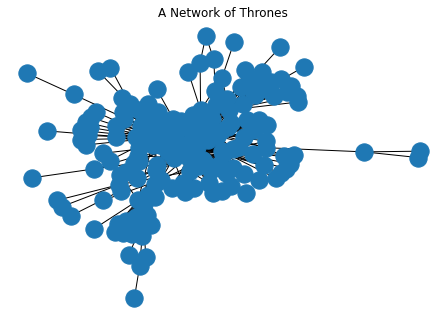

In [16]:
G = nx.from_pandas_edgelist(df, source='Source', target='Target')
nx.draw(G)
plt.title('A Network of Thrones')

&#9989; **Question 3.2.1 (2 points)** Let's check that your previous answers are correct. Print the number of nodes and edges 

In [20]:
# Put your code here
nodes = list(G.nodes)
print("Number of nodes:",len(nodes))
edges = list(G.edges)
print("Number of edges:",len(edges))


Number of nodes: 187
Number of edges: 684


## Who is the most important character? 

Below you can find a representation of the graph of the network of thrones and you can see it is a very complex network. Unfortunately it is very difficult to create such a graph with `networkx`, as a matter of fact `networkx` documentation says that it is better to use dedicated software for this. [Ref](https://networkx.org/documentation/stable/reference/drawing.html#:~:text=Proper%20graph%20visualization%20is%20hard%2C%20and%20we%20highly%20recommend%20that%20people%20visualize%20their%20graphs%20with%20tools%20dedicated%20to%20that%20task.%20Notable%20examples%20of%20dedicated%20and%20fully%2Dfeatured%20graph%20visualization%20tools%20are%20Cytoscape%2C%20Gephi%2C%20Graphviz%20and%2C%20for%20LaTeX%20typesetting%2C%20PGF/TikZ.) 

So here is the result of someone else' work to make our life easy for now. The colors in the graph indicate a particular community. If you want to know more how the researchers define community you can read their work [here](https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf).

<img src="https://networkofthrones.files.wordpress.com/2017/07/got1v3-network.png?w=676" width = 676>

[Image credit](https://networkofthrones.wordpress.com/the-novels/a-game-of-thrones/)

The goal of all data science projects is to answer a **specific** question. The network of thrones is a very complex network where no single character stands out as protagonist. As a matter of fact there is no protagonist in Game of Thrones, especially because you don't know if that character will survive till the end of the chapter. So let's try and find the answer to the following question:

    Who is the most important character in book 1 ?

### Centrality
But what does it mean to be _the most important character_ ? How do we define _important_ ? Well, in the world of TV critics everybody will have their opinion so let's create our own based on science. Luckily in network science we can measure the importance (or centrality) of each node. However, even in math there are multiple definitions of centrality. [Here](https://en.wikipedia.org/wiki/Centrality) is a list of possible network centrality measures. Obviously there are too many of them, so we will select only a few

### Degree
The simplest centrality measure is to count the number of edges connected to each node. This number is called the `degree` of each node and you can use the **method** [`degree`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.degree.html#degree) to calculate it.  

### Weighted Degree Centrality
The second simplest centrality measure is to weight the degree of each node based on the weight of its edges. In other words calculated the degree of each node by summing the weight of each of its edges. `networkx` does not have a function to calculate this, however, the **method** [`degree`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.degree.html#degree) does have an option `weight` in it. 

### [Eigenvector Centrality](https://en.wikipedia.org/wiki/Eigenvector_centrality)
Let's get a little more complex now. Graphs can be represented as square matrices as such we can do some linear algebra on them. Specifically, we can find the eigenvectors and eigenvalues of the matrix. Mathematically, each node is given a score based on this equation

$$n_i = \frac{1}{\lambda} \sum_{j} a_{i,j} n_j$$

where $n_i$ is the $i$th node, $a_{i,j}$ is equal to 1 if the $n_i$ and $n_j$ are connected and 0 otherwise, and $\lambda$ is the largest eigenvalue of the adjacency matrix. In other words a high eigenvector centrality score for node $n_i$ indicates that it is connected to many other nodes who themselves have high eigenvector centrality scores. In terms of our network of thrones, it means that a character with a high eigenvector scores is connected to many other characters who themselves are well connected, _i.e._ how powerful are your connections? 

Don't worry I won't ask you to write a code to do the above math, `networkx` has a function for it. It is called, [`eigenvector_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html). 

### Weighted Eigenvector Centrality
Notice that the matrix elements $a_{ij}$ above are either 1 or 0. What if we use the weights of the edges as the matrix elements? This can be easily done by adding the option `weight = "weight"` into the function [`eigenvector_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html). 


&#9989; **Question 3.3 (8 points)** In the following cell or cells write some code that:
    - calculates the **degree, weighted degree, eigenvector centrality, and weighted eigenvector centrality** for each node
    - makes a plot that shows the first five central characters according to each measure. Your plot should be similar to the one below
    

![image](https://github.com/msu-cmse-courses/cmse202-F22-data/blob/main/HW/Homework_3/got_plots.png)

In [21]:
sorted_ec

[0.29640893871843454,
 0.2694880017758138,
 0.23155019835665291,
 0.22520388145217876,
 0.22075394589376898]

TypeError: unhashable type: 'list'

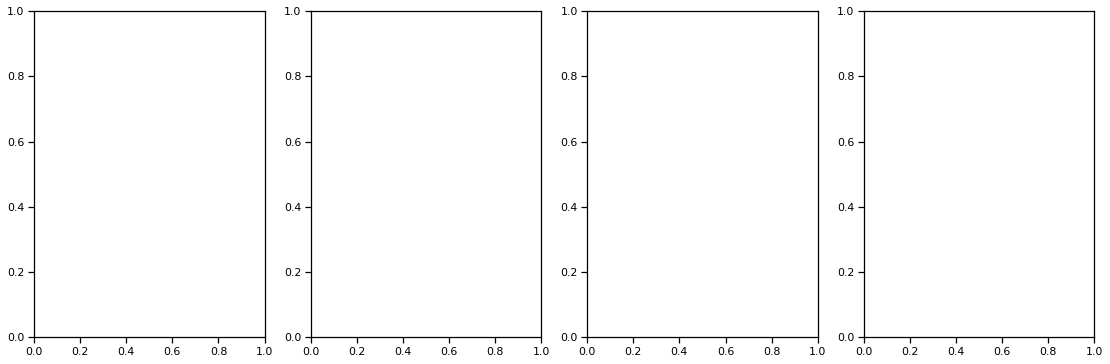

In [22]:
# Put your code here
degree = G.degree(nodes)
weighted_degree = G.degree(nodes,edges)
ec = nx.eigenvector_centrality(G)
weighted_ec = nx.eigenvector_centrality(G, weight = "weight")


# make your plot here using the fig, ax created above
fig, axes = plt.subplots(1, 4, figsize = (19, 6))

sorted_degree = sorted(degree, key=lambda t: t[1], reverse=True)[:5]
sorted_ec = sorted(ec.values(), reverse=True)[:5]
sorted_wdegree = sorted(weighted_degree, reverse=True)[:5]
sorted_wec = sorted(weighted_ec.values(), reverse=True)[:5]

# Degree 
degree_list = []
for d in sorted_degree:
    degree_list.append(d[1])

axes[0].plot(degree_list)

# Weighted Degree
wdegree_list = []
for w in sorted_wdegree:
    wdegree_list.append(w[1])
    
axes[1].plot(wdegree_list)

# Eigenvector Centrality
ec_list = []
for e in sorted_ec:
    ec_list.append(e)
    
axes[2].plot(ec_list)

# Weighted Eigenvector Centrality
wec_list = []
for c in sorted_wec:
    wec_list.append(c)
    
axes[3].plot(wec_list)

&#9989; **Question 3.3.1 (5 points)** All four measures seems to agree on the first two most important characters. However, they don't agree on the third most important person. Based on the above analysis who would you say is the third most important and why did you choose them? Explain your answer.

_Note:_ This question does not have a correct answer. You will get full points if you provide a well thought reason for your answer. However, you get zero points if you just give a name without explanation. 
Here are examples of answers that will still get zero points:

- [character name] because I watched all the seasons of Game of thrones and know where this is going.
- [character name] because they are my favorite character.
- [character_name] because I don't have time to do this question
- Jon Snow because like him I don't know nothing

The following is an example of an answer worth 2 points

- [character_name] because they appear in the top five of at least three metrics




### &#128721; STOP
**Pause to commit your changes to your Git repository! (1 point)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 3", 

---

<a id="part4"></a>
[Back to ToC](#toc)

# Part 4. Finishing up (3 points)


It is now time to merge your changes to the main branch and push

&#9989; **Question 4.1 (1 point):** Switch to your main branch

```bash
# Put the command(s) to switch to your main branch
```

&#9989; **Question 4.2 (1 point):** Merge your hw04-branch

```bash
# Put the command(s) to merge your branch
```

&#9989; **Question 4.3 (1 point):** Finally push the changes to GitHub

```bash
# Put the command(s) to push your new main branch
```

## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [23]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/WgM1mw9He8" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #3, and upload **your notebook** there.

&#169; Copyright 2022,  Department of Computational Mathematics, Science and Engineering at Michigan State University